## VIF Test

In [34]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df = pd.read_excel('data/24-TF-GLO-1 - Clean_dataset.xlsx')
features = ['2', 'Age Group', '10', 'Disability', 'i_group', 'i_type']

X = pd.get_dummies(df[features], drop_first=True, dtype=float)
X = X.dropna()
X_const = add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [round(variance_inflation_factor(X_const.values, i), 2) 
              for i in range(X_const.shape[1])]

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [35]:
vif

,Variable,VIF
0,const,0.00
1,2_Male,1.15
2,Age Group_25 - 34,3.16
3,Age Group_35 - 44,3.54
4,Age Group_45 - 54,2.92
5,Age Group_55 - 64,2.32
6,Age Group_Above 65 years,2.79
7,10_Indigenous beliefs,1.10
8,10_Islam,1.49
9,Disability_No Disability,1.07


## OLS Test (CCTD)

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

y = df["CCTD_score"]
y = y.dropna()

X = pd.get_dummies(df[features], drop_first=True, dtype=float)

X_vars = [
    "2_Male",
    "Age Group_25 - 34",
    "Age Group_35 - 44",
    "Age Group_45 - 54",
    "Age Group_55 - 64",
    "Age Group_Above 65 years",
    "10_Indigenous beliefs",
    "10_Islam",
    "Disability_No Disability",
]
X = X[X_vars]
mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask]
y = y.loc[mask]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CCTD_score   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.835
Date:                Mon, 15 Sep 2025   Prob (F-statistic):            0.00291
Time:                        10:54:50   Log-Likelihood:                -1021.8
No. Observations:                 506   AIC:                             2064.
Df Residuals:                     496   BIC:                             2106.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## NEW Graph (Quantitative Survey Distribution by Country)

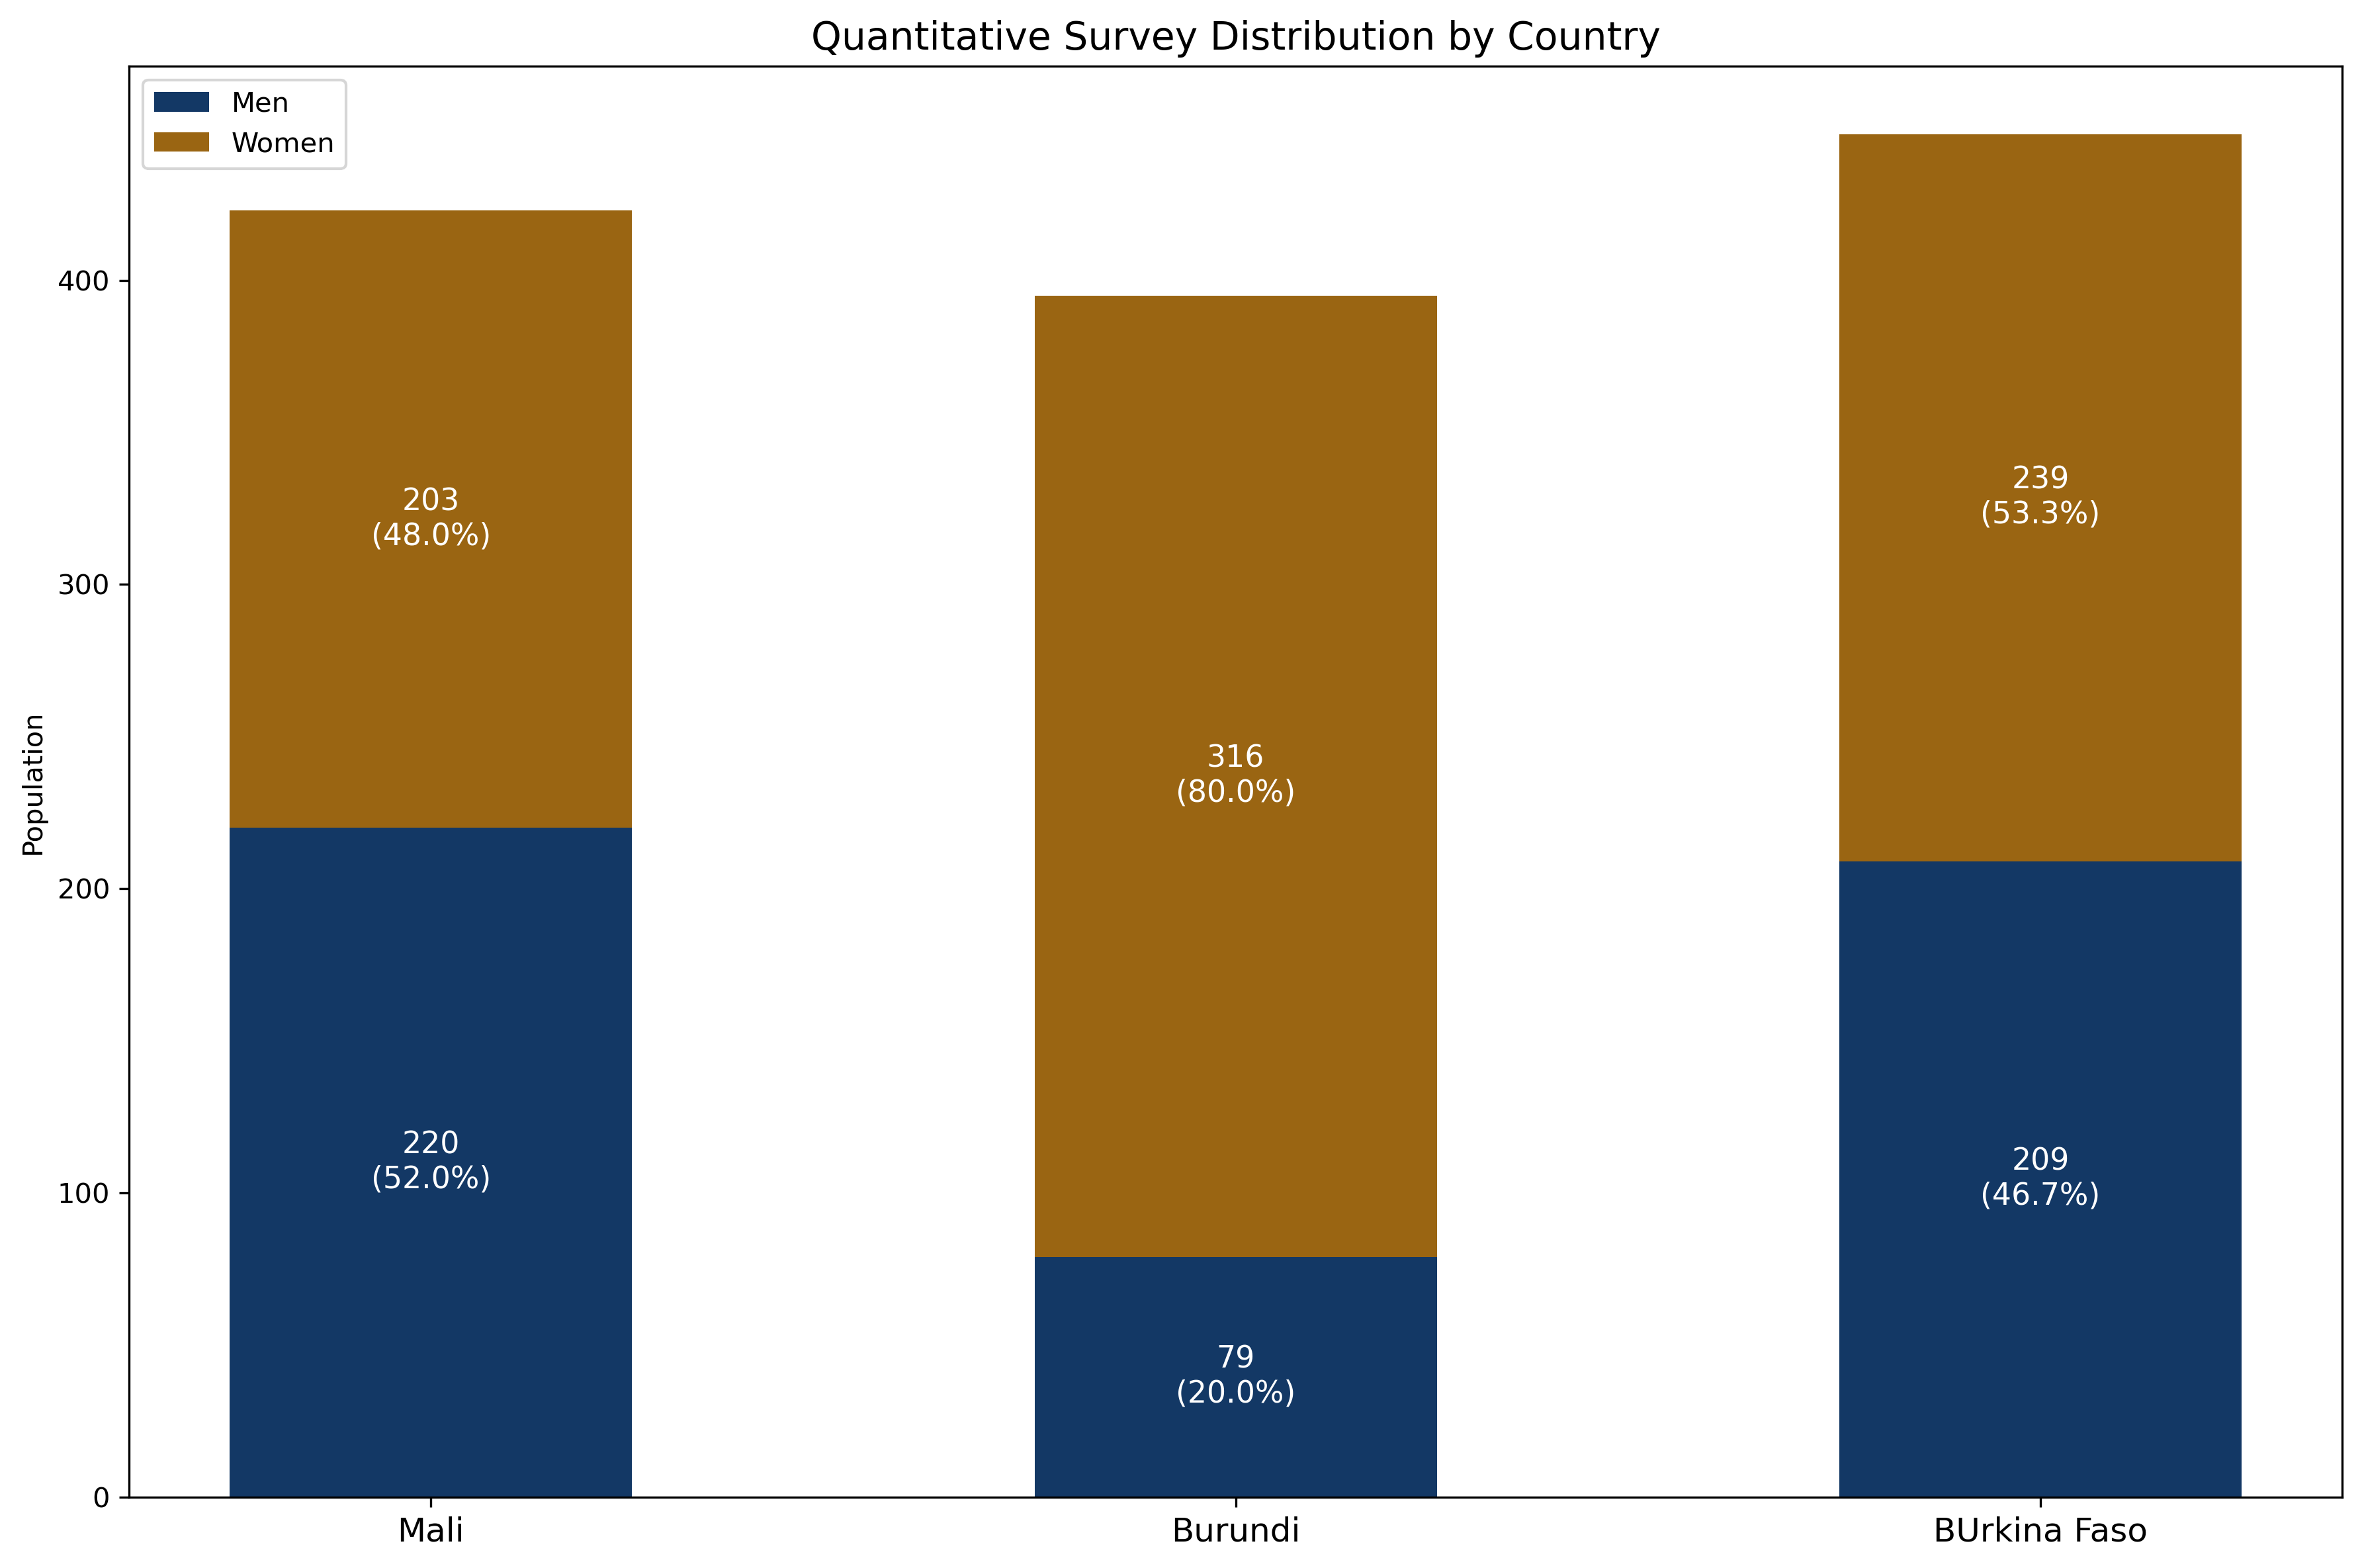

In [23]:
import matplotlib.pyplot as plt
import numpy as np

data = {"Mali": [220, 203], "Burundi": [79, 316], "BUrkina Faso": [209, 239]}
countries = list(data.keys())
men = [data[c][0] for c in countries]
women = [data[c][1] for c in countries]

totals = [m + w for m, w in zip(men, women)]

men_ratios = [m/t*100 for m, t in zip(men, totals)]
women_ratios = [w/t*100 for w, t in zip(women, totals)]

bodhi_blue = (0.0745, 0.220, 0.396)
bodhi_complement = (0.604, 0.396, 0.071)

x = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(12,8), dpi=300)

bars1 = ax.bar(x, men, width=0.5, label="Men", color=bodhi_blue)
bars2 = ax.bar(x, women, width=0.5, bottom=men, label="Women", color=bodhi_complement)

for i, (m, w, total, mr, wr) in enumerate(zip(men, women, totals, men_ratios, women_ratios)):
    ax.text(i, m/2, f"{m}\n({mr:.1f}%)", ha='center', va='center', color='white', fontsize=11)
    ax.text(i, m + w/2, f"{w}\n({wr:.1f}%)", ha='center', va='center', color='white', fontsize=11)

ax.set_xticks(x)
ax.set_xticklabels(countries, fontsize=12)
ax.set_ylabel("Population")
ax.set_title("Quantitative Survey Distribution by Country", fontsize=14)
ax.legend()

plt.tight_layout()

plt.savefig("gender_distribution.png", dpi=300, bbox_inches="tight")

plt.show()